## Group project - Closed orbit corrections

Start from the lattice of Exercise 3 and assume random misalignments of the quadrupoles of r.m.s. 0.1 mm in the horizontal and 0.2 mm in the vertical plane. Calculate the expected r.m.s. orbit and verify with MAD-X (misalignments are established with the command EALIGN).

Add the necessary equipment to be able to correct the closed orbit in both planes. Estimate 1st the maximum necessary strength of the orbit correctors assuming a maximum quadrupole displacement of 1 mm. Use MAD-X to correct the orbit in both planes. 
What is the effect of the correction on the dispersion?


## Computations
In ideal condition with no magnet misallignment and fabrication error we consider close orbit correspond to the reference orbit. This is not always true. In fact, during the machine operation one can switch on dipole correctors additional to the ones defining the alignement of the magnetic elements.
Here we consider quadrupole misallignment as orbit distortion source.

By = gx   === quad misalignment ===>  By = gx - gdx

Dipole field error at $s_0$ point deflect beam in the order of $\Theta$ angle. deflection angle is proportional to $\frac {dx}f$ which f is quadrupole focal length.

To evaluate this effect using the linear matrices approache and assuming linear matrix of a one turn map as ${M_{OTM}(s_0)}$ and a single thin kick Θ at $s_0$ we can write

$X_{m+1}(s_0) = M_{OTM} (s_0) . X_m(s_0) + \Theta$     -------(1)

In the 1D case $\Theta$ can represent a kick of a dipole correction or misalignment of a quadrupole. The closed orbit solution can be retrieved imposing $X_{m+1} = X_m$ (fixed point after 1-turn). So from (1) we have:

$X_n(s_0) = [(I − M_{OTM} (s_0))^{−1}] . \Theta(s_0)$   -------(2)

From equation (2) we can find the fixed point in $s_0$. Close orbit is discontinuous in $s_0$ so equation (2) refers to close orbit after the kick. Solving equation (2) and transporting the fixed point from $s_0$ to s result in following equation which tell us orbit distortion by a statistical approach (I have not solved it myseld and I am following Guido solution):

$X_{co} = \frac{\sqrt{\beta(s)\beta(s_0)}}{2.sin(\pi Q)}.\theta_{s_0}.cos(\phi-\pi Q)$ ----(3)

In above equation $\theta_{s_0}$ is kick in $s_0$ point, Q is machine tune and $\phi$ is phase difference between orbit distortion measurement point to kick point:  
$\phi = |\phi_s - \phi_{s_0}|$

In presence of multiple kicks we need to add all kick effects considering their position, beta value and phase difference from the point which we measure orbit distortion. one can sum the single contributions along s.

In real life we measure orbit distortion by BPM. We need to know sensitivity of optic oscillation of particle to components misallignements. In this way we will be able to put limit on misallignment errors. In absence of knowledge about errors we use statistical methods to determine the most probable equilibrium orbit.
By application of 0.1 mm RMS value for quad misallignment we can have several arrangment of quadrupoles with 0.1 mm RMS misallignment. In order to understand how different distributions of quadrupole misallignemtns may change orbit distortion we calculate orbit distortion for 100 possible quadrupole misallinment conditions. In this way we will have orbit distortion for 100 quadrupole misallignment cases. This approach is a statistical approach and will give us possible boundary of orbit distortion change due to quadrupole misallignment distribution.

In addition to statistical approach for orbit distortion value we can calculate RMS value of orbit distortion by:

$\sqrt{<X_{co}^2>} = \frac{\sqrt{\bar{\beta}^2.N}}{2\sqrt{2}.f.sin(\pi Q)}.\sigma$

$\sigma$ is standard deviation of quadrupoles misallignment, considering Gaussian misallignment distribution of errors with 0.1 mm RMS value result in $\sigma=0.001$

In [2]:
from __future__ import print_function
from cpymad.madx import Madx
from ipywidgets import interact, interactive, fixed, interact_manual
import matplotlib.pyplot as plt
import sympy as sy
import numpy as np
from sympy import init_session
get_ipython().magic('matplotlib inline')
%config IPCompleter.greedy=True
%matplotlib inline
%config InlineBackend.figure_format = 'retina' # retina display
import matplotlib.patches as patches

def plotLatticeSeries(ax,series, height=1., v_offset=0., color='r',alpha=0.5,lw=3):
    aux=series
    ax.add_patch(
    patches.Rectangle(
        (aux.s-aux.l, v_offset-height/2.),   # (x,y)
        aux.l,          # width
        height,          # height
        color=color, alpha=alpha,lw=lw
    )
    )
    return;

In [3]:
madx = Madx()
madx.input('''

TITLE, ’CAS2019 Project Exercise 2’;

!int kh[20]; /* kh and kv are arrays of 20 integers */
!int kv[20];
!/* initialize elements of the arrays */         
!for ( i = 0; i < 20; i++ ) {
!    kh[i] = 0;
!    kv[i] = 0;
!}
circum=1000.0;
ncell = 20; !Number of cells 
lcell = circum/ncell;
lq = 3.00; !Length of a quadrupole
lk = 0.00001; !length of the kickers
 
!We have 4 bending magnets per cell
mb:multipole,knl={2.0*pi/(4*ncell)};

qf: multipole,knl:={0,0.0098*lq}; 
qd: multipole,knl:={0,-0.0098*lq};

!Define the sextupoles as multipole
lsex = 0.00001; // dummy length, only used in the sequence;

!Use knl:= and NOT knl= to match later ! 
msf: multipole, knl:={0,0,ksf};
msd: multipole, knl:={0,0,ksd};

!Beam position monitor:
bpmx: HMONITOR;
bpmy: VMONITOR;


!Adjusters of misalignment:
!i=20;
!for (i=0, i<20, i++){
    HK: HKICKER, kick:=kh;![i];
    VK: VKICKER, kick:=kv;![i];

!Now let's correct with coupling:
ssf: multipole,ksl:={0,0.0001*lq*button};

!sequence declaration;
cas6: sequence, refer=centre, l=circum;
   start_machine: marker, at = 0;
   n = 1;
   while (n < ncell+1) {
    qf: qf,   at=(n-1)*lcell;
    msf: msf, at=(n-1)*lcell + lsex/2.0;
    bpmx: bpmx, at=(n-1)*lcell + lsex + 0.00001;
    hk: hk, at=(n-1)*lcell + lsex + 0.00001 + lk/2.0;
    ssf: ssf at = (n-1)*lcell + lsex + 0.00001 + lk*3.0/2.0;
    mb: mb,   at=(n-1)*lcell + 0.15*lcell;
    mb: mb,   at=(n-1)*lcell + 0.35*lcell;
    qd: qd,   at=(n-1)*lcell + 0.50*lcell;
    msd: msd, at=(n-1)*lcell + 0.50*lcell + lsex/2.0;
    bpmy: bpmy, at=(n-1)*lcell + 0.50*lcell + lsex + 0.00001;
    vk: vk, at=(n-1)*lcell + 0.50*lcell + lsex + 0.00001 + lk/2.0;
    !sqd: sqd at=(n-1)*lcell + 0.50*lcell + lsex + 0.00001 + lk*3.0/2.0;
    mb: mb,   at=(n-1)*lcell + 0.65*lcell;
    mb: mb,   at=(n-1)*lcell + 0.85*lcell;
    n = n + 1;
}
end_machine: marker at=circum;
endsequence;

!Define the beam and its properties
Beam, particle = proton, sequence=cas6, energy = 20.0;

use, sequence=cas6;

USEMONITOR, STATUS=ON, SEQUENCE=cas6, PATTERN='bpm.';

!Slicing the domain to have a nicer picture:
select,flag=interpolate, class=drift, slice=5, range=#s/#e;

ksf=0;
ksd=0;
button = 0;
twiss;
survey;
''')


  ++++++++++++++++++++++++++++++++++++++++++++
  +     MAD-X 5.05.01  (64 bit, Linux)       +
  + Support: mad@cern.ch, http://cern.ch/mad +
  + Release   date: 2019.06.07               +
  + Execution date: 2019.11.05 07:09:01      +
  ++++++++++++++++++++++++++++++++++++++++++++
++++++ info: n redefined
++++++ info: n redefined
++++++ info: n redefined
++++++ info: n redefined
++++++ info: n redefined
++++++ info: n redefined
++++++ info: n redefined
++++++ info: n redefined
++++++ info: n redefined
++++++ info: n redefined
++++++ info: n redefined
++++++ info: n redefined
++++++ info: n redefined
++++++ info: n redefined
++++++ info: n redefined
++++++ info: n redefined
++++++ info: n redefined
++++++ info: n redefined
++++++ info: n redefined
++++++ info: n redefined
++++++ info: 40 monitor(s) affected
enter Twiss module

++++++ table: summ

            length             orbit5               alfa            gammatr 
              1000                 -0       0.1789932276        

True

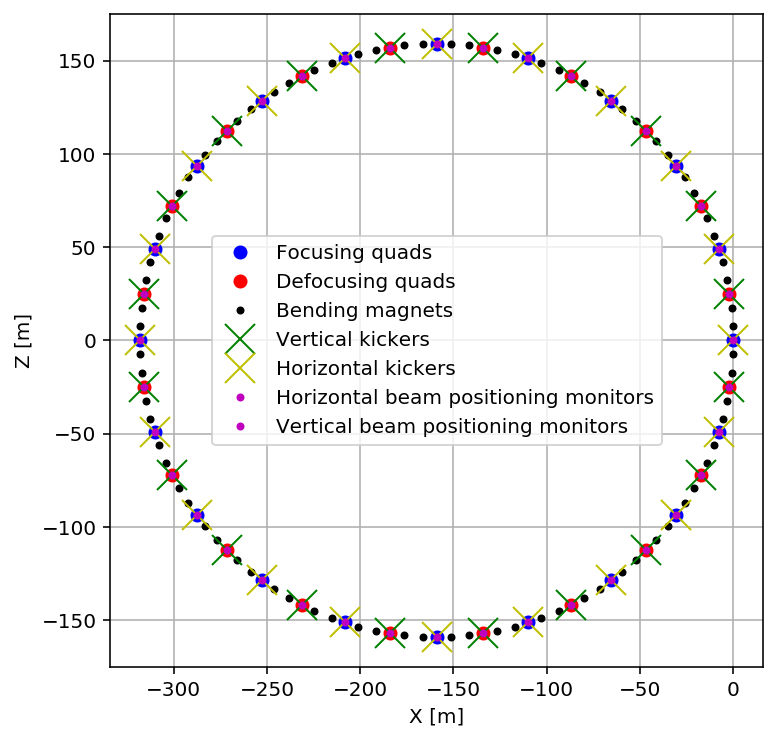

In [4]:
import numpy as np
mySurvey=madx.table.survey.dframe()
myDF=madx.table.twiss.dframe()

#Sanity check:

plt.rcParams['figure.figsize'] = [6,6]
qfSurvey=mySurvey[mySurvey['name'].str.contains('qf')]
qdSurvey=mySurvey[mySurvey['name'].str.contains('qd')]
mbSurvey=mySurvey[mySurvey['name'].str.contains('mb')]
vkSurvey=mySurvey[mySurvey['name'].str.contains('vk')]
hkSurvey=mySurvey[mySurvey['name'].str.contains('hk')]
bpmxSurvey=mySurvey[mySurvey['name'].str.contains('bpmx')]
bpmySurvey=mySurvey[mySurvey['name'].str.contains('bpmy')]


qf=plt.plot(qfSurvey.x,qfSurvey.z,'ob', label='Focusing quads')
qd=plt.plot(qdSurvey.x,qdSurvey.z,'or', label='Defocusing quads')
mb=plt.plot(mbSurvey.x,mbSurvey.z,'.k', label='Bending magnets')
vk=plt.plot(vkSurvey.x,vkSurvey.z,'xg', markersize=15, label='Vertical kickers')
hk=plt.plot(hkSurvey.x,hkSurvey.z,'xy', markersize=15, label='Horizontal kickers')
bpmx=plt.plot(bpmxSurvey.x,bpmxSurvey.z,'.m', label='Horizontal beam positioning monitors')
bpmy=plt.plot(bpmySurvey.x,bpmySurvey.z,'.m', label='Vertical beam positioning monitors')


plt.axis('square')
plt.xlabel('X [m]')
plt.ylabel('Z [m]')
plt.legend()
plt.grid()

#### Now we implement quadrupole RMS Gaussian misallignment error by 0.1 mm in X and 0.2 mm in Y 

In result we will see that close orbit distortion (xcomax, xcorms, ycomax & ycorms) can not stay zero anymore.

In [30]:
madx.input('''
!Create the misalignments in both planes to then correct it with the dipoles:

!Misalignments in x and y:
use, sequence = cas6;
SELECT, FLAG=ERROR, PATTERN="Q.*";
EALIGN, DX := 0.0001*TGAUSS(3), DY : = 0.0002*TGAUSS(3);

SELECT, FLAG=ERROR, PATTERN="Q.*";
ESAVE;
twiss;
''')

myTwiss1=madx.table.twiss.dframe()

Assigned alignment errors to 40 elements
enter Twiss module

++++++ table: summ

            length             orbit5               alfa            gammatr 
              1000                 -0       0.1789930526        2.363643166 

                q1                dq1            betxmax              dxmax 
       2.395724244       -2.518384148        100.0267292         34.4591919 

             dxrms             xcomax             xcorms                 q2 
       29.69849357    0.0006866495149    0.0002650691996        2.395724244 

               dq2            betymax              dymax              dyrms 
      -2.518384148        100.0267292     0.007897426697      0.00369908657 

            ycomax             ycorms             deltap            synch_1 
    0.002023327679    0.0007255607592                  0                  0 

           synch_2            synch_3            synch_4            synch_5 
                 0                  0                  0           

Index(['name', 'k0l', 'k0sl', 'k1l', 'k1sl', 'k2l', 'k2sl', 'k3l', 'k3sl',
       'k4l',
       ...
       'p16l', 'p16sl', 'p17l', 'p17sl', 'p18l', 'p18sl', 'p19l', 'p19sl',
       'p20l', 'p20sl'],
      dtype='object', length=102)

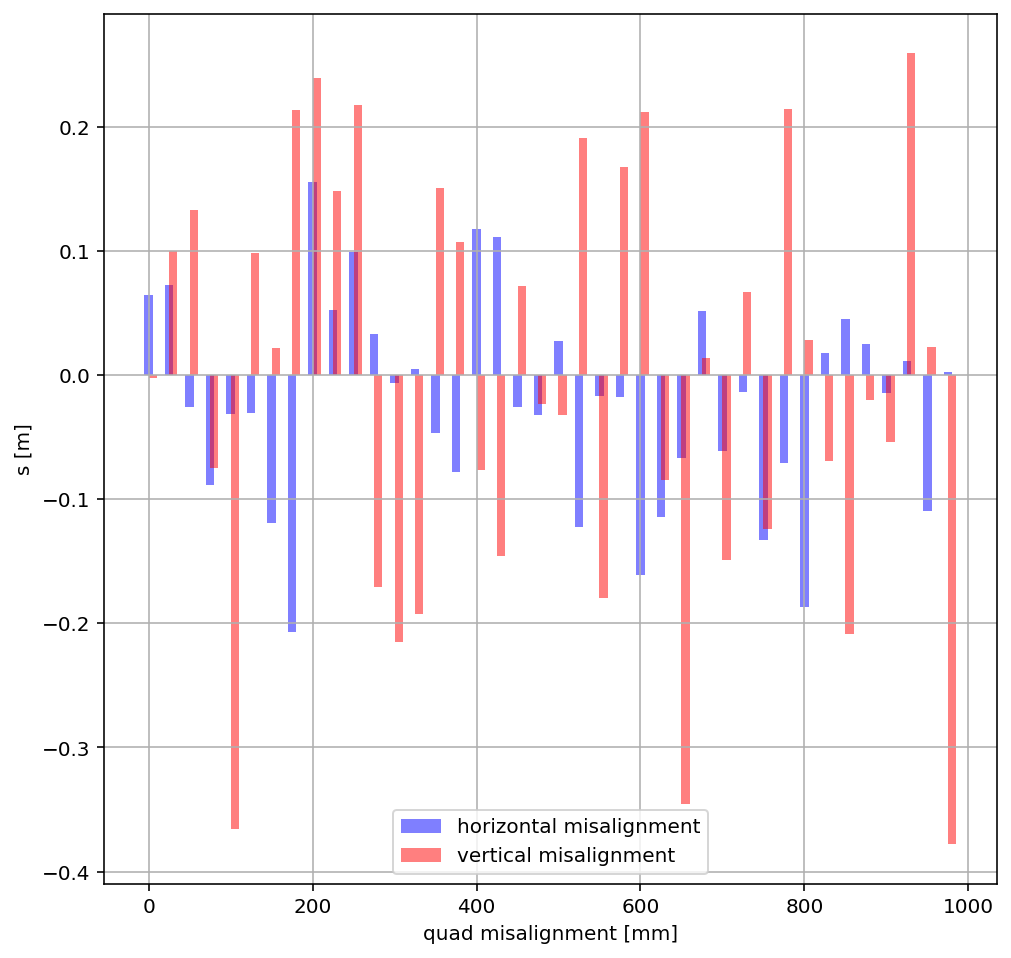

In [31]:
aux=madx.table.efield.dframe()
#aux.dx
display(aux.columns)
n = 1
lcell = 50
qf_loc=[]
qd_loc=[]
while n < 21:
    qf_loc.append((n-1)*lcell);

    qd_loc.append((n-1)*lcell + 0.50*lcell);
   
    n = n + 1;
quads=[]

import numpy as np
qdd=np.array(qf_loc)   
qff=np.array(qd_loc)  
quadS=np.sort(np.append(qdd,qff))

plt.bar(quadS, aux.dx*1000, align='center', width=10, alpha=0.5, color='b', label='horizontal misalignment')
plt.bar(quadS, aux.dy*1000, align='edge', width=10, alpha=0.5, color='r', label='vertical misalignment')
plt.xlabel('quad misalignment [mm]')
plt.ylabel('s [m]')
plt.gca().legend(('horizontal misalignment','vertical misalignment'))
plt.grid()

### Histograms:
By plotting histograms on the distribution of misalignments in both directions, we can see approximately the Gaussian pattern (it is not very well-shaped due to the small value of samples)

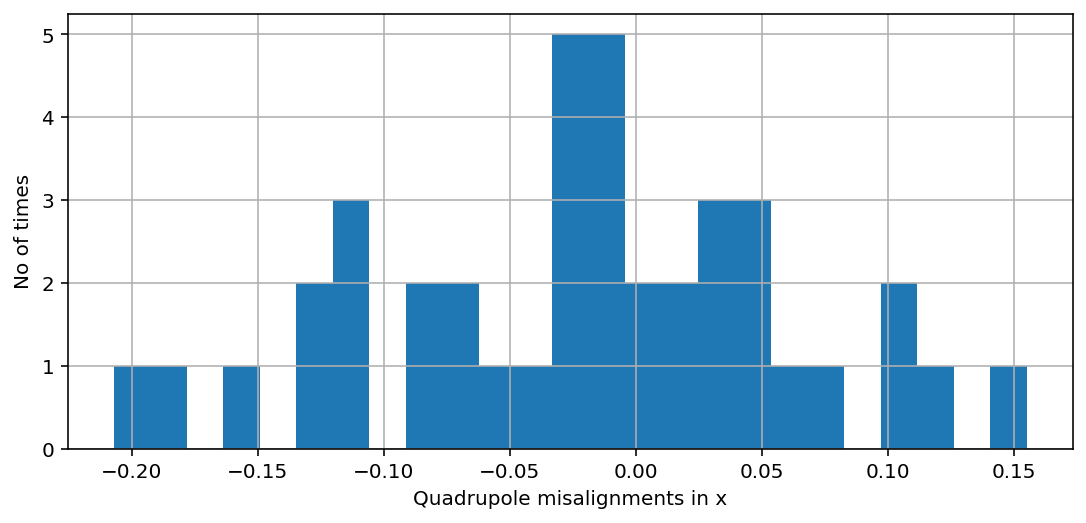

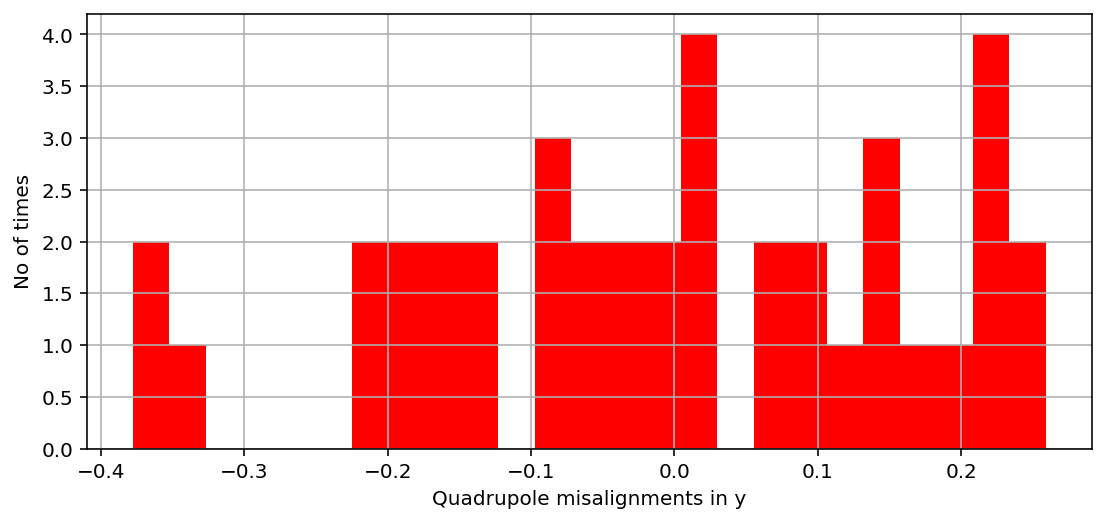

In [32]:
from pylab import rcParams
rcParams['figure.figsize'] = 9, 4
plt.hist(aux.dx*1000, bins=25)
plt.xlabel('Quadrupole misalignments in x')
plt.ylabel('No of times')
plt.grid()
plt.show()

plt.figure()
plt.hist(aux.dy*1000, bins=25, color='r')
plt.xlabel('Quadrupole misalignments in y')
plt.ylabel('No of times')
plt.grid()
plt.show()

### Tracking:

Now, let's prepare the code for tracking a particle with 0.1 mm offset in both planes

In [33]:
myString='''
TRACK;
START, X=0.0001, PX=0, Y=0.0001, PY=0, T=0, PT=0;
RUN, TURNS=1023;
ENDTRACK;
'''
madx.input(myString);

myParticle=madx.table['track.obs0001.p0001'].dframe()
myParticle.head()

enter TRACK module

++++++ table: tracksumm

    number       turn                  x                 px 
         1          0             0.0001                  0 
         1       1023    0.0001765358027    2.808482055e-06 

                 y                 py                  t                 pt 
            0.0001                  0                  0    2.220446049e-16 
  -1.451698744e-05    2.808477053e-06       0.2323272028    2.220446049e-16 

                 s                  e 
                 0                  0 
              1000                  0 
exit TRACK module



,number,turn,x,px,y,py,t,pt,s,e
#e,1.0,0.0,0.000100,0.000000,0.000100,0.000000,0.000000,2.220446e-16,0.0,20.0
#e,1.0,1.0,-0.000169,-0.000002,-0.000038,-0.000002,0.000297,2.220446e-16,0.0,20.0
#e,1.0,2.0,0.000168,0.000003,-0.000040,0.000003,0.000525,2.220446e-16,0.0,20.0
#e,1.0,3.0,-0.000097,-0.000003,0.000101,-0.000003,0.000681,2.220446e-16,0.0,20.0
#e,1.0,4.0,-0.000014,0.000002,-0.000121,0.000002,0.001020,2.220446e-16,0.0,20.0


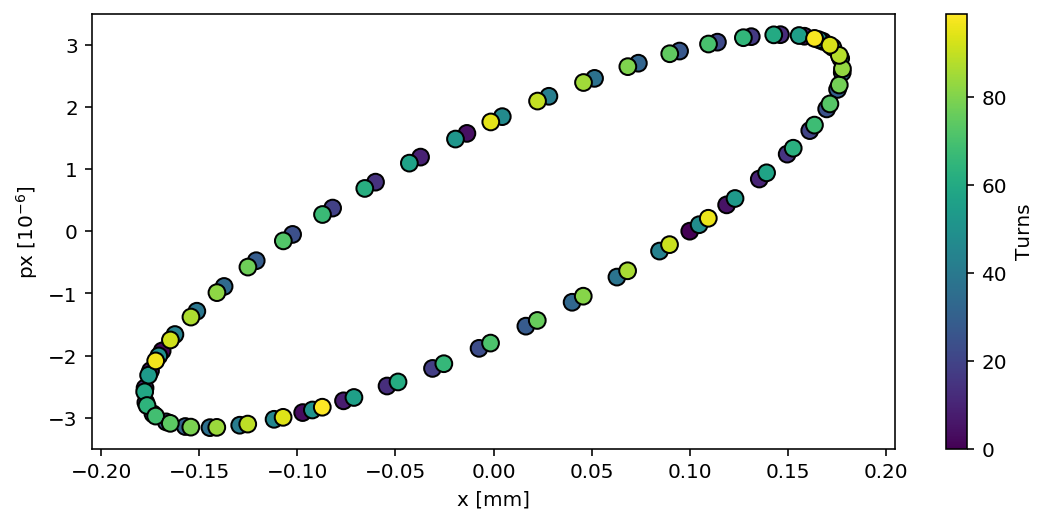

In [34]:
myParticle100=myParticle[0:100]
plt.scatter(myParticle100['x']*1000,myParticle100['px']*1e6,c=myParticle100['turn'],s=70, edgecolor='black')
myColorbar=plt.colorbar()
myColorbar.set_label('Turns')
plt.xlabel('x [mm]')
plt.ylabel('px [$10^{-6}$]');

# The particle rotates clockwise in the transverse plane

### Theoretical calculations:
discussed theory in the begining of this file is plotted using considered lattice parameters


In [44]:
import numpy as np
import matplotlib.pyplot as plt
import math

N=40
f=34.01
Q=2.3957
beta_max=100.026
beta_min=46.264
ave_beta=(beta_max+beta_min)/2
standard_deviation_x=1e-4
standard_deviation_y=2e-4
standard_deviation_xy=math.sqrt(2e-4**2+1e-4**2)

A1=2*math.sqrt(2)*f*math.sin(math.pi*Q)

Orbit_Distortion_X=(math.sqrt(ave_beta*ave_beta*N)*standard_deviation_x)/A1
Orbit_Distortion_Y=(math.sqrt(ave_beta*ave_beta*N)*standard_deviation_y)/A1


print('RMS orbit distortion in x is',Orbit_Distortion_X)
print('RMS orbit distortion in y is',Orbit_Distortion_Y)

ss = np.ones((100,))
Orbit_Distortion_X=Orbit_Distortion_X*ss
Orbit_Distortion_Y=Orbit_Distortion_Y*ss

#plt.plot(Orbit_Distortion_X, 'r')
#plt.plot(Orbit_Distortion_Y, 'g')

RMS orbit distortion in x is 0.0005079335201365437
RMS orbit distortion in y is 0.0010158670402730873


Calculated value for RMS orbit distortion in x is just for one typical quadrupole misallignment pattern.
In order to understand effect of different quadrupole misallignemt patterns on RMS orbit distortion value, here 100 quadrupole misallignment patterns are considered and in each case RMS orbit distortion is calculated.

In [45]:
import numpy as np

myList=[]
for i in range(100):
    myString=f'''
    eoption,add=false, seed={i};
    select,flag=error,pattern="q.*";
    ealign, dx:=tgauss(10.0)*0.1e-3,dy:=tgauss(3.0)*0.2e-3;
    select, flag=errortable;
    etable, table=errortable;

    twiss;
    '''
    madx.input(myString)
    myList.append(madx.table.summ.xcorms)
   
myTwissAfterMisalignment=madx.table.twiss.dframe()

Replaced alignment errors for 40 elements
enter Twiss module

++++++ table: summ

            length             orbit5               alfa            gammatr 
              1000                 -0       0.1789939494        2.363637245 

                q1                dq1            betxmax              dxmax 
       2.395724244       -2.518384148        100.0267292        34.46131986 

             dxrms             xcomax             xcorms                 q2 
        29.6985575    0.0009213102659    0.0003462394346        2.395724244 

               dq2            betymax              dymax              dyrms 
      -2.518384148        100.0267292      0.01231768741     0.005897329116 

            ycomax             ycorms             deltap            synch_1 
    0.002843337645     0.001112449781                  0                  0 

           synch_2            synch_3            synch_4            synch_5 
                 0                  0                  0          

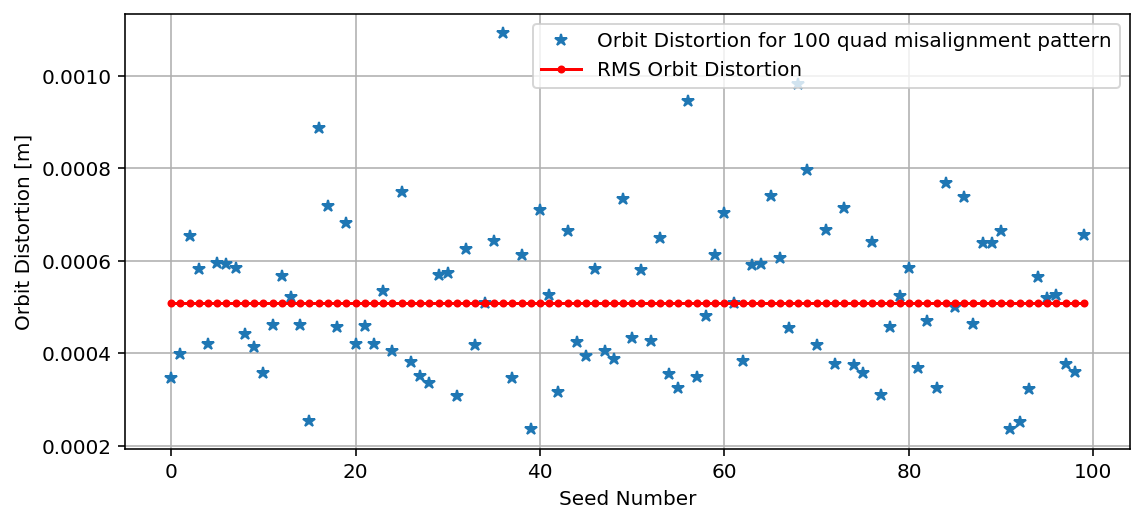

In [46]:
import matplotlib.pyplot as plt

plt.plot(myList,'*', label='Orbit Distortion for 100 quad misalignment pattern')
plt.plot(Orbit_Distortion_X, 'r.-', label='RMS Orbit Distortion')
plt.xlabel('Seed Number')
plt.ylabel('Orbit Distortion [m]')
plt.grid()
plt.legend()
plt.show()

### Orbit correction:
 Let's correct that dipolar kick because of quadrupole misallignment using the built-in function "correct":

Want to correct orbit of a single ring
20 monitors and 20 correctors found in input
20 monitors and 20 correctors enabled
SVD conditioning requested ...
Initially found 0 singular values
After SVD conditioning:             
20 monitors and 20 correctors enabled

Finally found 0 singular values
enter MICADO correction ...
Requested 0 correctors (???) set to 20
CORRECTION SUMMARY:   

                   average [mm]   std.dev. [mm]      RMS [mm]        peak-to-peak [mm]

before correction: 0.269720        0.713631          0.762902        2.268154 
after correction:  0.000000        0.000000          0.000000        0.000000 


Max strength: 9.012226e-03 is below corrector strength limit: 1.000000e+00
Want to correct orbit of a single ring
20 monitors and 20 correctors found in input
20 monitors and 20 correctors enabled
SVD conditioning requested ...
Initially found 0 singular values
After SVD conditioning:             
20 monitors and 20 correctors enabled

Finally found 0 singular val

Text(0.5, 1.0, 'Comparison between x(s) and y(s) after kicker correction')

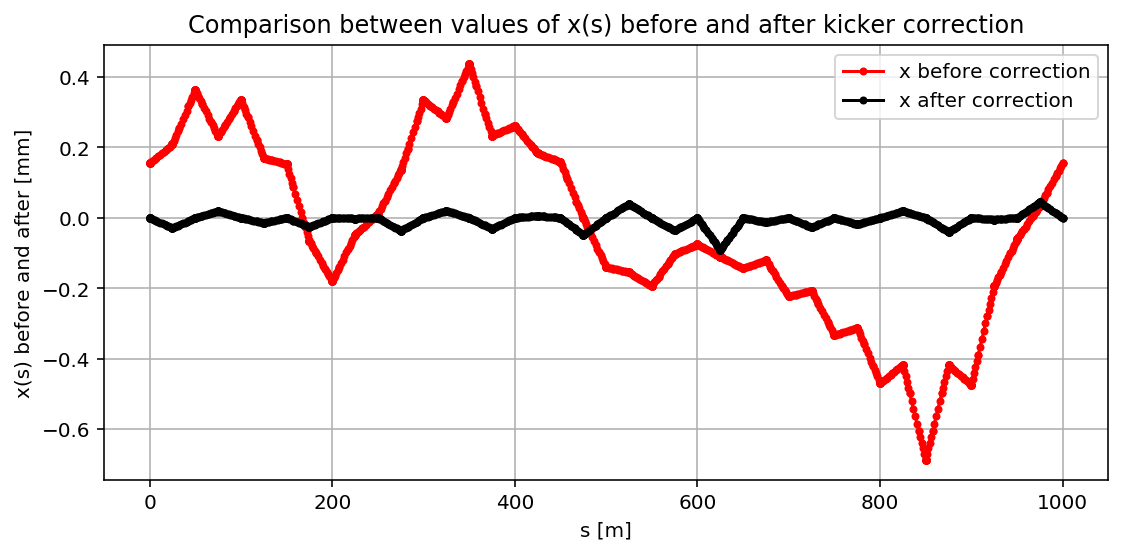

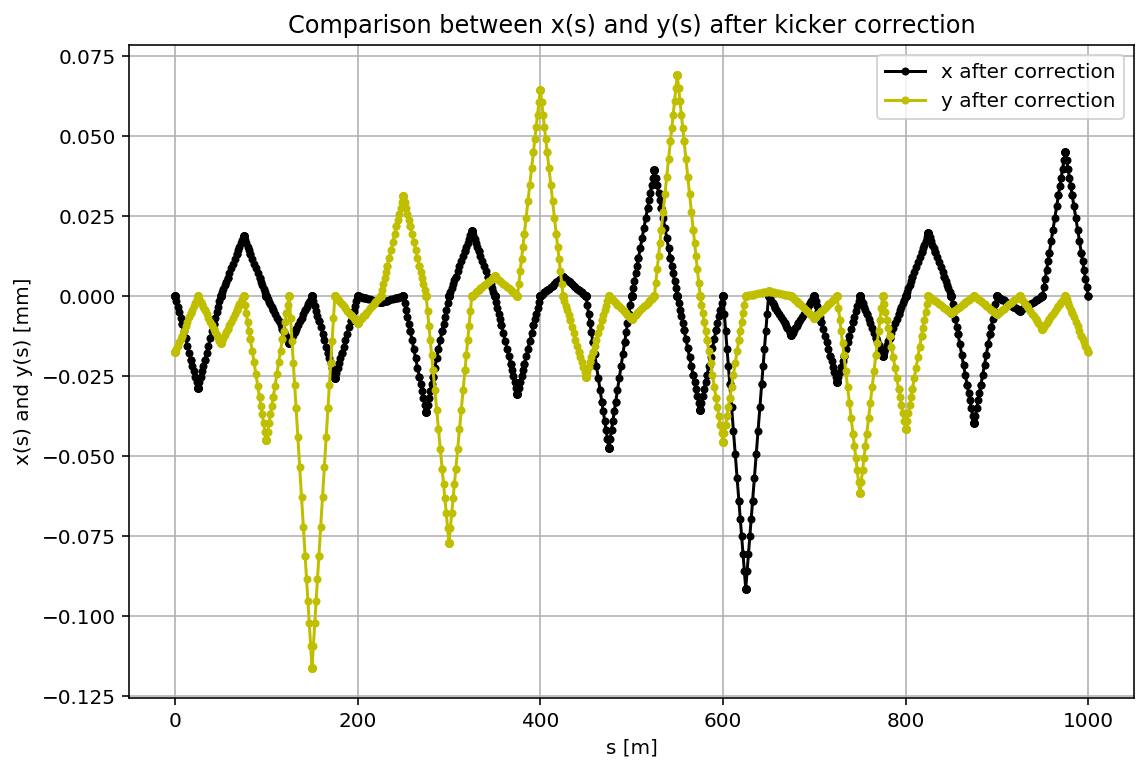

In [23]:
madx.input('''
!Now let's correct the orbits:
correct, flag=ring, plane=x, cond=1, error=1.e-15;
correct, flag=ring, plane=y, cond=1, error=1.e-15; 
twiss;
''')

myTwiss2=madx.table.twiss.dframe()

#Plot x(s) before and after correction:
fig1=plt.plot(myTwiss1['s'], myTwiss1['x']*1000, 'ro-', markersize=3, label='x before correction')
fig1=plt.plot(myTwiss2['s'], myTwiss2['x']*1000, 'ko-', markersize=3, label='x after correction')
plt.rcParams['figure.figsize'] = [9,6]
plt.xlabel('s [m]')
plt.ylabel('x(s) before and after [mm]')
plt.grid()
plt.legend()
plt.title('Comparison between values of x(s) before and after kicker correction')

plt.figure()

fig2=plt.plot(myTwiss2['s'], myTwiss2['x']*1000, 'ko-', markersize=3, label='x after correction')
fig2=plt.plot(myTwiss2['s'], myTwiss2['y']*1000, 'yo-', markersize=3, label='y after correction')
plt.rcParams['figure.figsize'] = [9,6]
plt.xlabel('s [m]')
plt.ylabel('x(s) and y(s) [mm]')
plt.grid()
plt.legend()
#plt.gca().legend(('horizontal misalignment','vertical misalignment'))
plt.title('Comparison between x(s) and y(s) after kicker correction')
#setArrowLabel(plt.gca(), label='Remaning difference due to bigger \ninitial standard deviation', labelPosition=(400, 8/100), arrowPosition=(700, 5/100), myColor='m',arrowArc_rad=-0.2)